Autor: Ivan Hajpek
    
JMBAG: 0036521886
    
Kolegij: Uvod u znanost o podacima

Tema: Heart Disease Prediction problem

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Priprema i vizualizacija podataka

Učitavam podatke:

In [4]:
data = pd.read_csv("heart_cleveland_upload.csv")

Kao prvotni pregled podataka ispisujem veličinu tablice i izgled prvih deset redaka.

In [3]:
print("Veličina skupa podataka: " + str(data.shape))
data.head(10)

Veličina skupa podataka: (297, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [4]:
data.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Značajke i njihova objašnjenja:
 - age : dob - cjelobrojne vrijednosti u intervalu [29, 77]
 - sex : spol - vrijednosti 0 ili 1
 - cp : vrsta boli u prsima - cjelobrojne vrijednosti u intervalu [0, 3]
 - trestbps : krvni tlak - cjelobrojne vrijednosti u intervalu [94, 200]
 - chol : razina kolesterola - cjelobrojne vrijednosti u intervalu [126, 564]
 - fbs : razina glukoze u krvi - vrijednosti 0 ili 1
 - restecg : rezultat ECG testiranja - cjelobrojne vrijednosti u intervalu [0, 2]
 - thalach : maksimalna vrijednost otkucaja srca u vrijeme prijema pacijenta - cjelobrojne vrijednosti u intervalu [71, 202]
 - exang : indikator ima li pacijent anginu - vrijednosti 0 ili 1
 - oldpeak : razina depresije - decimalne vrijednosti u intervalu [0, 6.2]
 - slope : razina ST depresije - cjelobrojne vrijednosti u intervalu [1, 3]
 - ca : status fluoroskopije - cjelobrojne vrijednosti u intervalu [0, 3]
 - thal : rezultat Thalliumovog testa - cjelobrojne vrijednosti u intervalu [0, 2]
 - condition : vrijednost koja označava ima li pacijent šansu da dobije zastoj srca - vrijednosti 0 ili 1

Analizu nam olakšava saznanje da u skupu podataka nemamo nedostajućih vrijednosti, odnosno da je broj
vrijednosti koje nisu "NaN" u svakome stupcu 918.

Provjerit ću imamo li u skupu podataka monotonih atributa.

In [5]:
data.nunique()

age           41
sex            2
cp             4
trestbps      50
chol         152
fbs            2
restecg        3
thalach       91
exang          2
oldpeak       40
slope          3
ca             4
thal           3
condition      2
dtype: int64

Na temelju tablice rekao bih da nema monotonih atributa pa ne moram mijenjati tablicu.

Na temelju tablice iznad, u stupcu oldpeak vidim velike razlike između maksimalnih vrijednosti i prosječnih vrijednosti atributa pa ću pretpostaviti da u tom stupcu postoji nekoliko stršećih vrijednosti. Kako bih pokazao postoje li, nacrtati ću ih na idućim dijagramima.


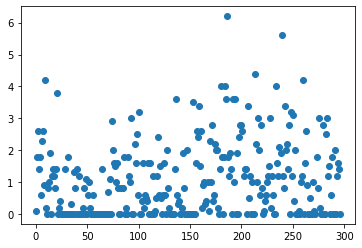

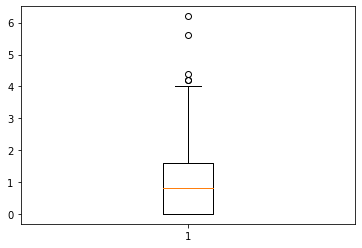

In [6]:
plt.scatter(range(0, 297), data.oldpeak)
plt.show()
plt.boxplot(data.oldpeak)
plt.show()

Vidimo da postoje 4 vrijednosti koje odudaraju značajnije od ostalih vrijednosti koje značajnije dolaze do izražaja tek na box plot dijagramu.

Sada ću prikazati raspodjelu osoba po dobi u ovome skupu odvajajući muški i ženski spol u zasebne stupce.

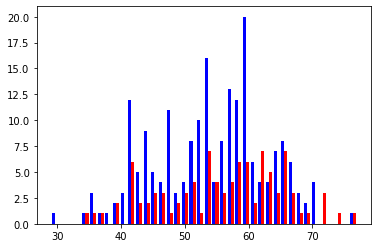

In [7]:
plt.hist([data.age[data.sex==1], data.age[data.sex==0]], bins=40, color=['blue', 'red'], label=['Muškarci', 'Žene'])
plt.show()

Osim toga što je jasno vidljivo da većinu osoba u skupu čine srednjovječni ljudi, vidimo i da je udio žena očigledno manji od udjela muškaraca.

Iduće želim prikazati ovisnost starosti osobe o razini kolesterola.

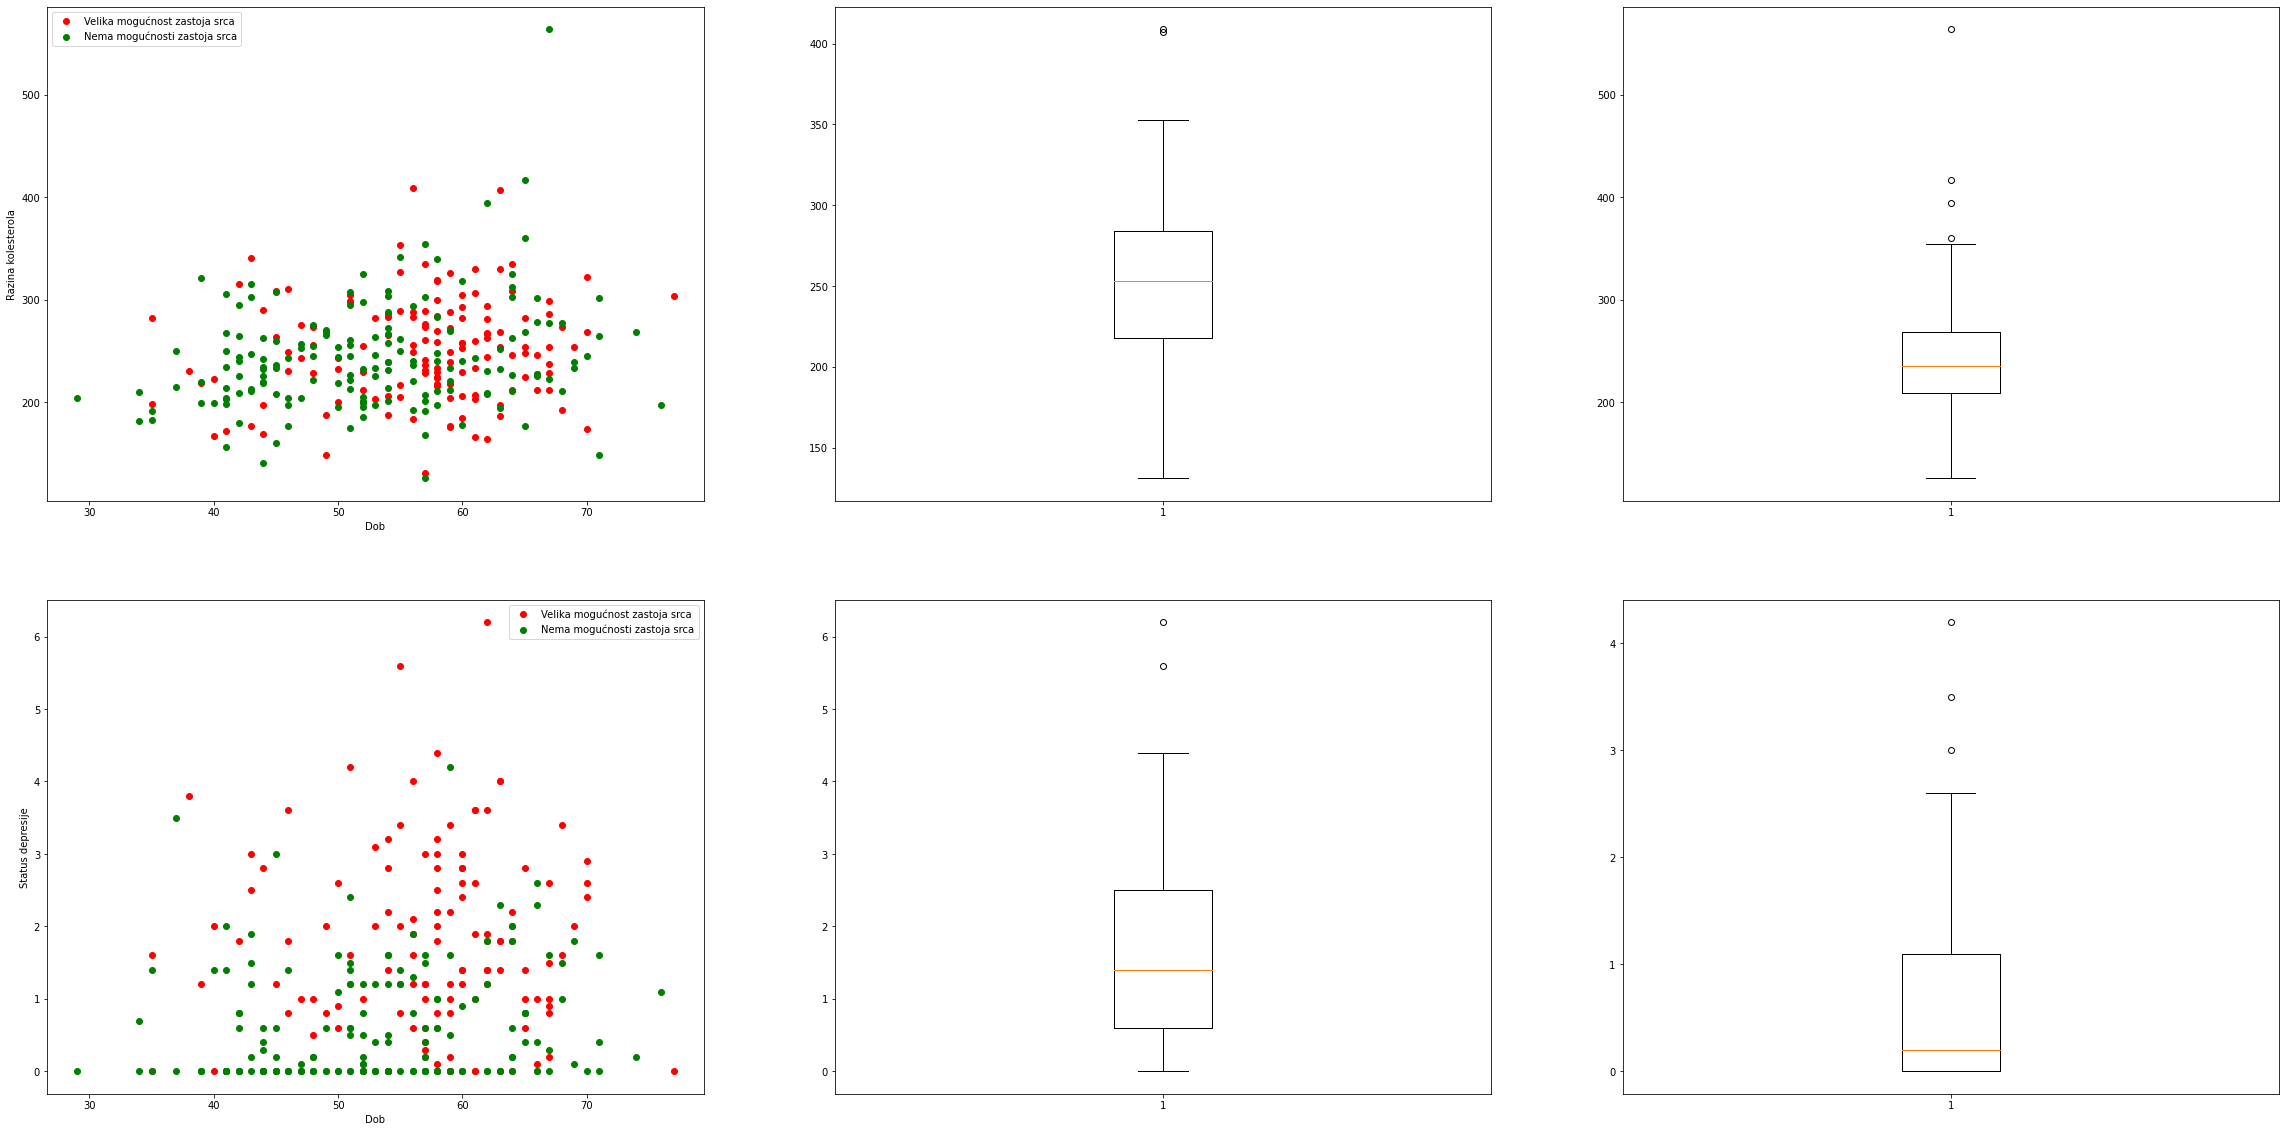

In [8]:
plt.figure(figsize=(40,20))
plt.subplot(2,3,1)
plt.scatter(data.age[data.condition==1], data.chol[data.condition==1], c = 'red', label = 'Velika mogućnost zastoja srca')
plt.scatter(data.age[data.condition==0], data.chol[data.condition==0], c = 'green', label = 'Nema mogućnosti zastoja srca')
plt.xlabel("Dob")
plt.ylabel("Razina kolesterola")
plt.legend(loc='best')
plt.subplot(2,3,2)
plt.boxplot(data.chol[data.condition==1])
plt.subplot(2,3,3)
plt.boxplot(data.chol[data.condition==0])
plt.subplot(2,3,4)
plt.scatter(data.age[data.condition==1], data.oldpeak[data.condition==1], c = 'red', label = 'Velika mogućnost zastoja srca')
plt.scatter(data.age[data.condition==0], data.oldpeak[data.condition==0], c = 'green', label = 'Nema mogućnosti zastoja srca')
plt.xlabel("Dob")
plt.ylabel("Status depresije")
plt.legend(loc='best')
plt.subplot(2,3,5)
plt.boxplot(data.oldpeak[data.condition==1])
plt.subplot(2,3,6)
plt.boxplot(data.oldpeak[data.condition==0])
plt.show()

Na temelju prvog grafa možemo zaključiti da razina kolesterola u krvi neznačajno utječe na zastoj srca, ali da ljudi s godinama mogu očekivati taj problem jer nakon 55 godina života postotak osoba s ovim problemom značajno raste. Prvi par kutijastih grafova nam potvrđuje da je prosjek razine kolesterola u krvi podjednak i za ljude s očekivanim, ali i neočekivanim srčanim problemima. Drugi graf raspršenja nam govori da razina varijable oldpeak u ispitanika izravno utječe na njegovo kardiološko zdravlje, dakle ljudi se većom razinom oldpeak atributa imaju veći rizik od zastoja srca. Idući par kutijastih grafova potvrđuje to.

Na idućim grafovima ću pie chartovima redom prikazati udjele vrijednosti značajki cp, restecg, slope.

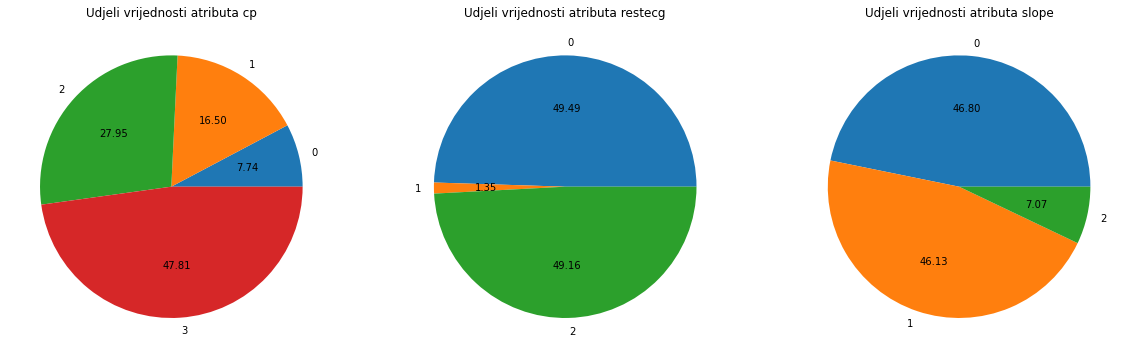

In [9]:
plt.figure(figsize=(20, 8))
count_per_title = data.groupby('cp').count().loc[:,'age'].values
title_name = data.groupby('cp').count().index.values
plt.subplot(1, 3, 1)
plt.pie(count_per_title, labels=title_name, autopct='%.2f')
plt.title("Udjeli vrijednosti atributa cp")
count_per_title = data.groupby('restecg').count().loc[:,'age'].values
title_name = data.groupby('restecg').count().index.values
plt.subplot(1, 3, 2)
plt.pie(count_per_title, labels=title_name, autopct='%.2f')
plt.title("Udjeli vrijednosti atributa restecg")
count_per_title = data.groupby('slope').count().loc[:,'age'].values
title_name = data.groupby('slope').count().index.values
plt.subplot(1, 3, 3)
plt.pie(count_per_title, labels=title_name, autopct='%.2f')
plt.title("Udjeli vrijednosti atributa slope")
plt.show()

Iz prvog grafa je vidljivo da većina osoba ima jake bolove u prsima jer je najsnažnija razina 3 najzastupljenija. Drugi graf nam govori da su rezultati ECG bipolarni jer pacijenti ili nemaju problema s kardiovaskularnim bolestima ili imaju većih problema. Tek mali broj ispitanika imao je umjerenih problema.

Na idućem grafu vidljivo je da je za vrijednosti oldpeak veće ili jednake 3, neovisno o varijabli slope, očekivano da pacijent ima problem zastoja srca.

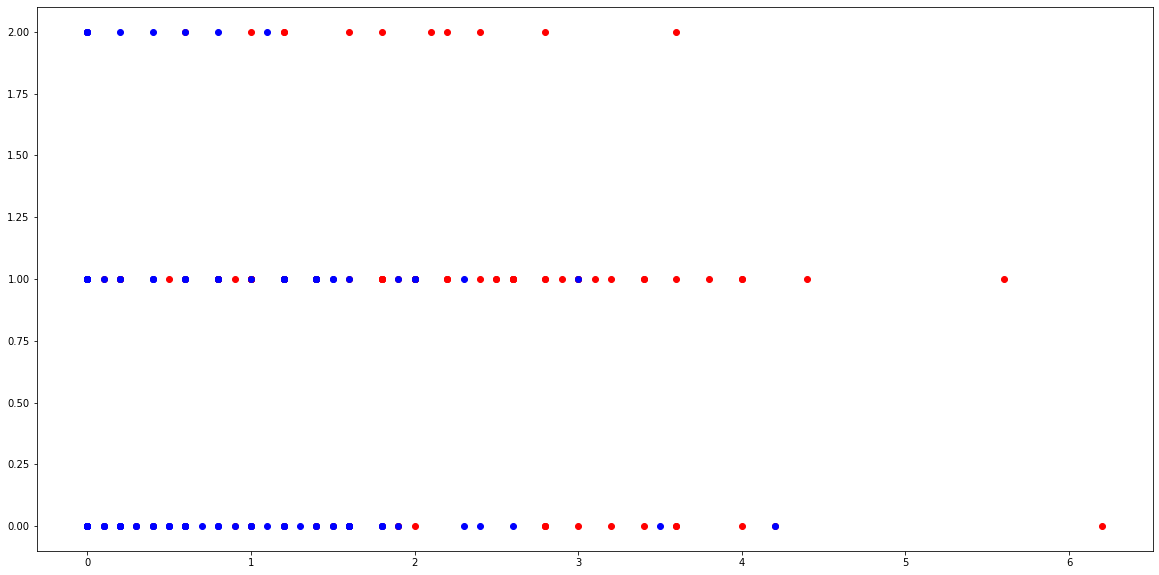

In [10]:
plt.figure(figsize=(20, 10))
plt.scatter(data.sort_values(by=['oldpeak']).oldpeak[data.condition==1], data.slope[data.condition==1], c='r')
plt.scatter(data.sort_values(by=['oldpeak']).oldpeak[data.condition==0], data.slope[data.condition==0], c='b')
plt.show()

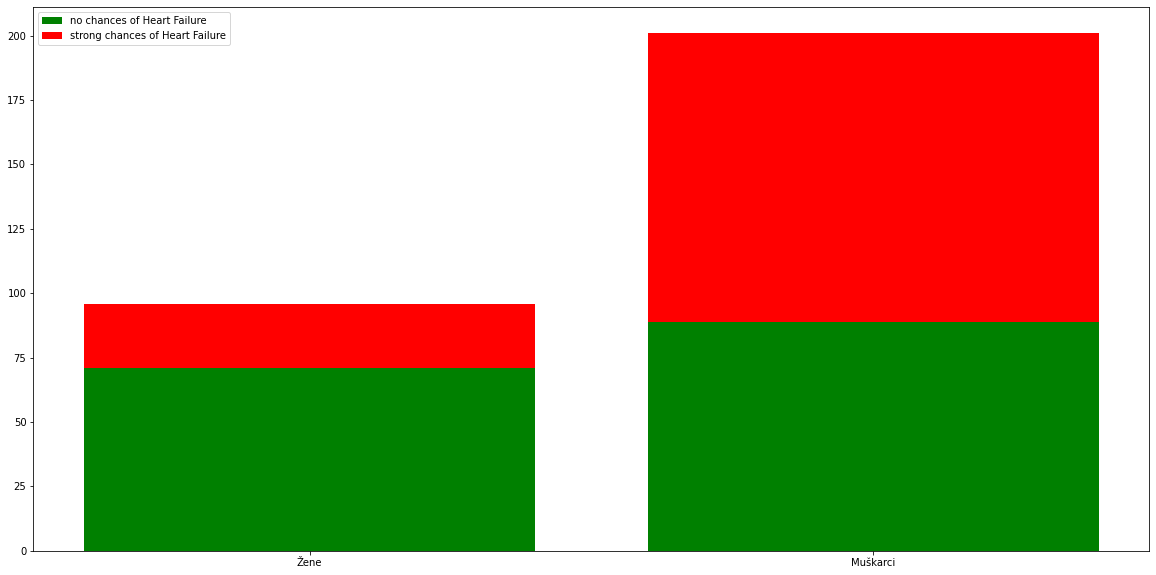

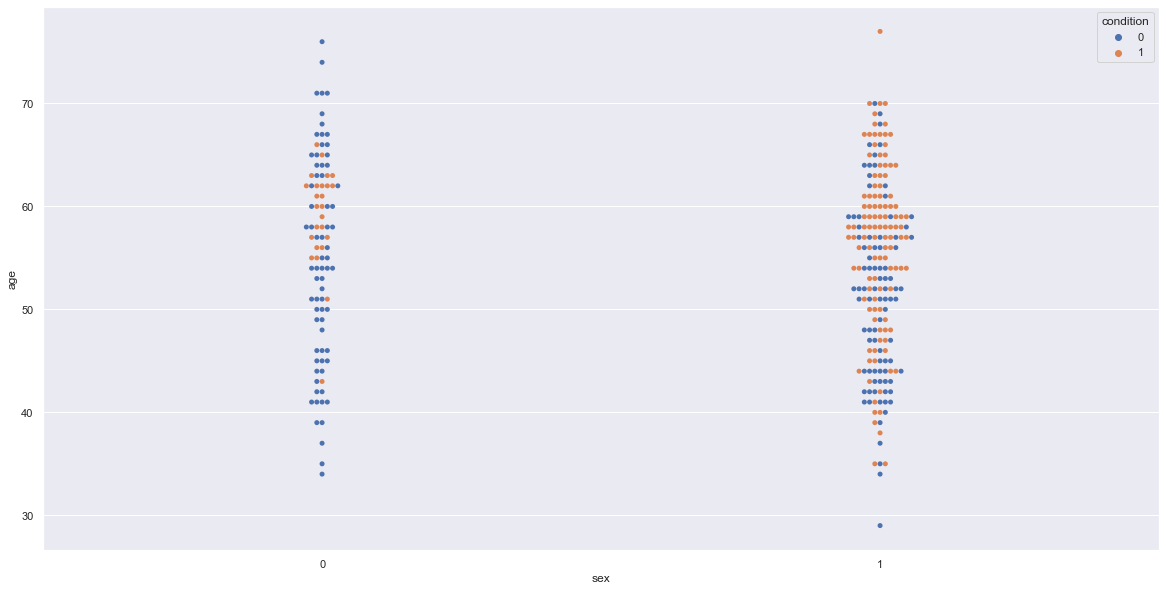

In [11]:
no_chances = data.condition == 0

count_no_chances = data.loc[no_chances,:].groupby('sex').count().loc[:,'age'].values
count_strong_chances = data.loc[~no_chances,:].groupby('sex').count().loc[:,'age'].values
names = ['Žene', 'Muškarci']
plt.figure(figsize=(20, 10))
plt.bar(names, count_no_chances, color='g', label='no chances of Heart Failure')
plt.bar(names, count_strong_chances, color='r', label='strong chances of Heart Failure', bottom=count_no_chances)
plt.legend(loc='best')
plt.show()

sns.set(rc={'figure.figsize':(20,10)})
sns.swarmplot(x='sex', y="age", data=data, hue="condition")
plt.show()

Primijetimo da u skupu ima znatno više muškaraca od žena, ali i da velika većina tih žena nema šanse za zastoj srca, dok je kod muškaraca obrnuta situacija jer većina ima očekivan zastoj srca.

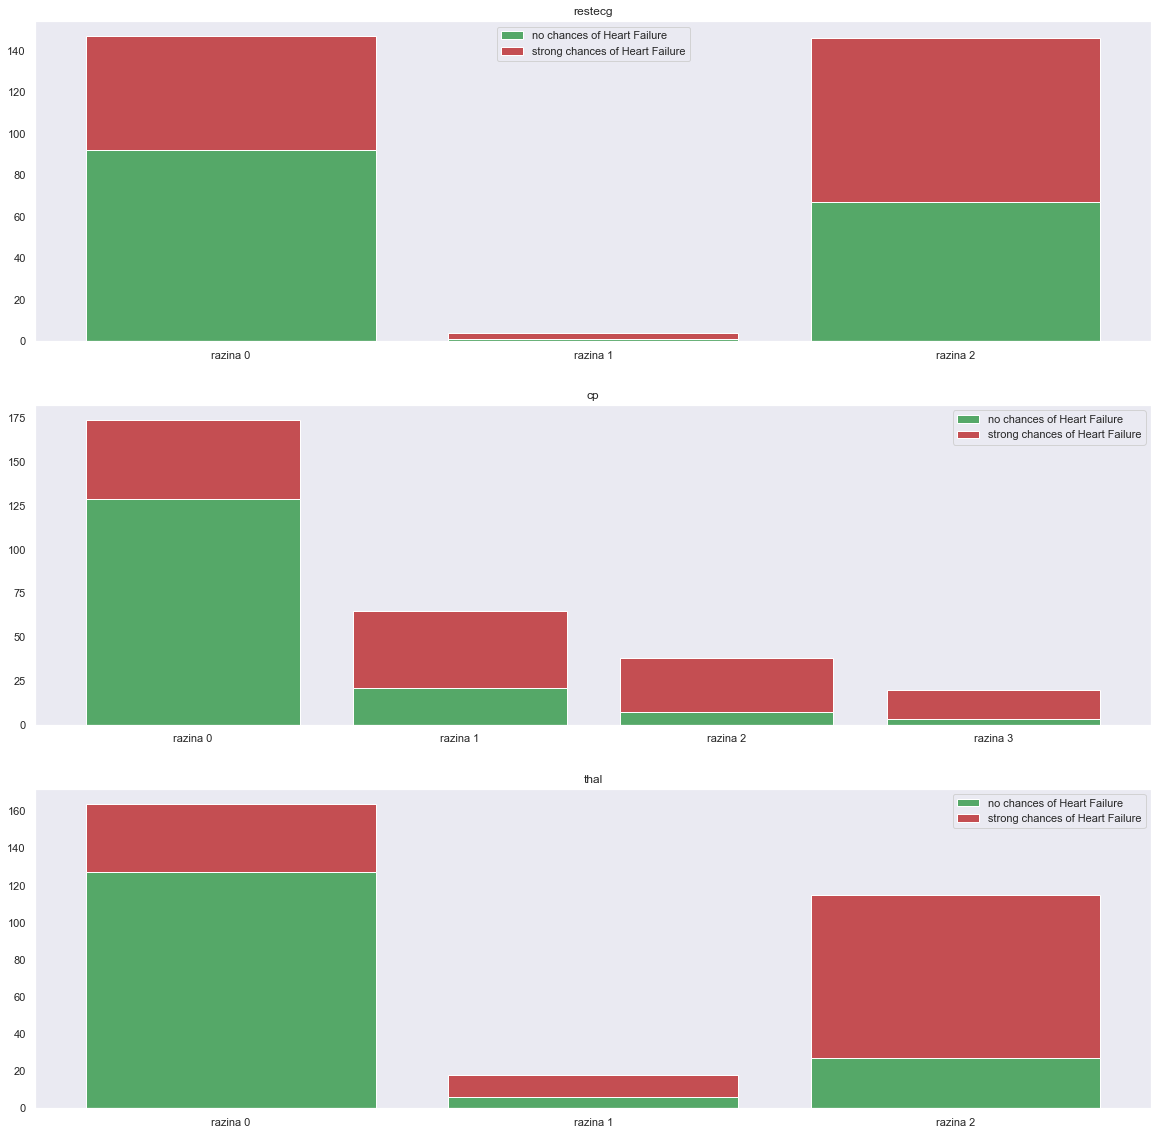

In [12]:
plt.figure(figsize=(20, 20))
plt.subplot(3,1,1)
no_chances = data.condition == 0
count_no_chances = data.loc[no_chances,:].groupby('restecg').count().loc[:,'age'].values
count_strong_chances = data.loc[~no_chances,:].groupby('restecg').count().loc[:,'age'].values
names = ['razina 0', 'razina 1', 'razina 2']
plt.bar(names, count_no_chances, color='g', label='no chances of Heart Failure')
plt.bar(names, count_strong_chances, color='r', label='strong chances of Heart Failure', bottom=count_no_chances)
plt.legend(loc='best')
plt.grid()
plt.title('restecg')

plt.subplot(3,1,2)
no_chances = data.condition == 0
count_no_chances = data.loc[no_chances,:].groupby('ca').count().loc[:,'age'].values
count_strong_chances = data.loc[~no_chances,:].groupby('ca').count().loc[:,'age'].values
names = ['razina 0', 'razina 1', 'razina 2', 'razina 3']
plt.bar(names, count_no_chances, color='g', label='no chances of Heart Failure')
plt.bar(names, count_strong_chances, color='r', label='strong chances of Heart Failure', bottom=count_no_chances)
plt.legend(loc='best')
plt.grid()
plt.title('cp')

plt.subplot(3,1,3)
no_chances = data.condition == 0
count_no_chances = data.loc[no_chances,:].groupby('thal').count().loc[:,'age'].values
count_strong_chances = data.loc[~no_chances,:].groupby('thal').count().loc[:,'age'].values
names = ['razina 0', 'razina 1', 'razina 2']
plt.bar(names, count_no_chances, color='g', label='no chances of Heart Failure')
plt.bar(names, count_strong_chances, color='r', label='strong chances of Heart Failure', bottom=count_no_chances)
plt.legend(loc='best')
plt.grid()
plt.title('thal')

plt.show()

Prethodna tri grafa nam pokazuju da za sve tri vrijednosti: restecg, cp i thal vrijedi slijedeće: Za svaku iduću vrijednost varijable, odnosno razine varijable, vrijedi da raste i mogućnost da pacijent ima problem zastoja srca.

Matrica korelacije nalazi se na idućoj slici.

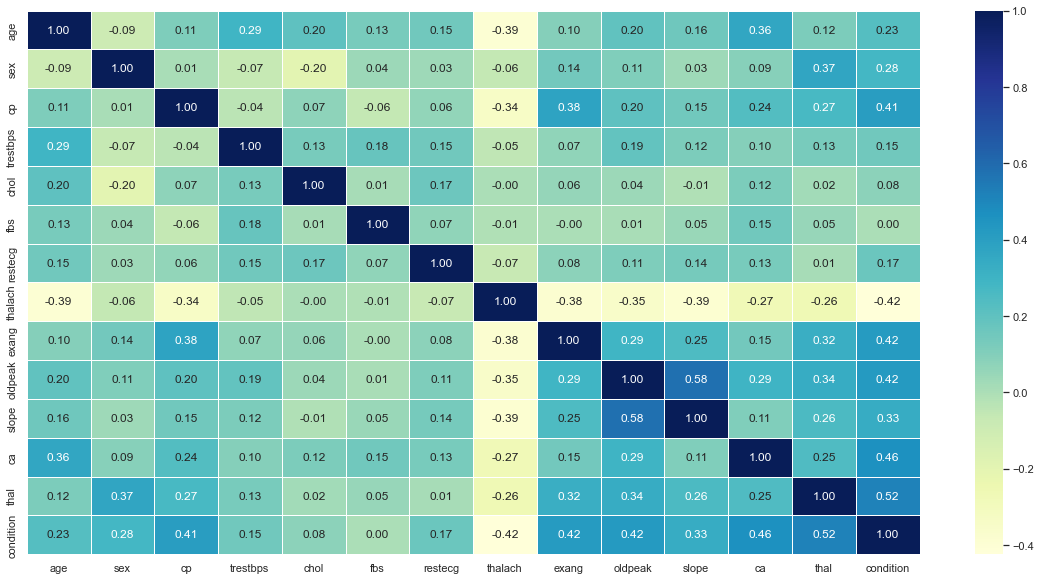

In [13]:
X_numeric = data
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(X_numeric.corr(), annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5)
plt.show()

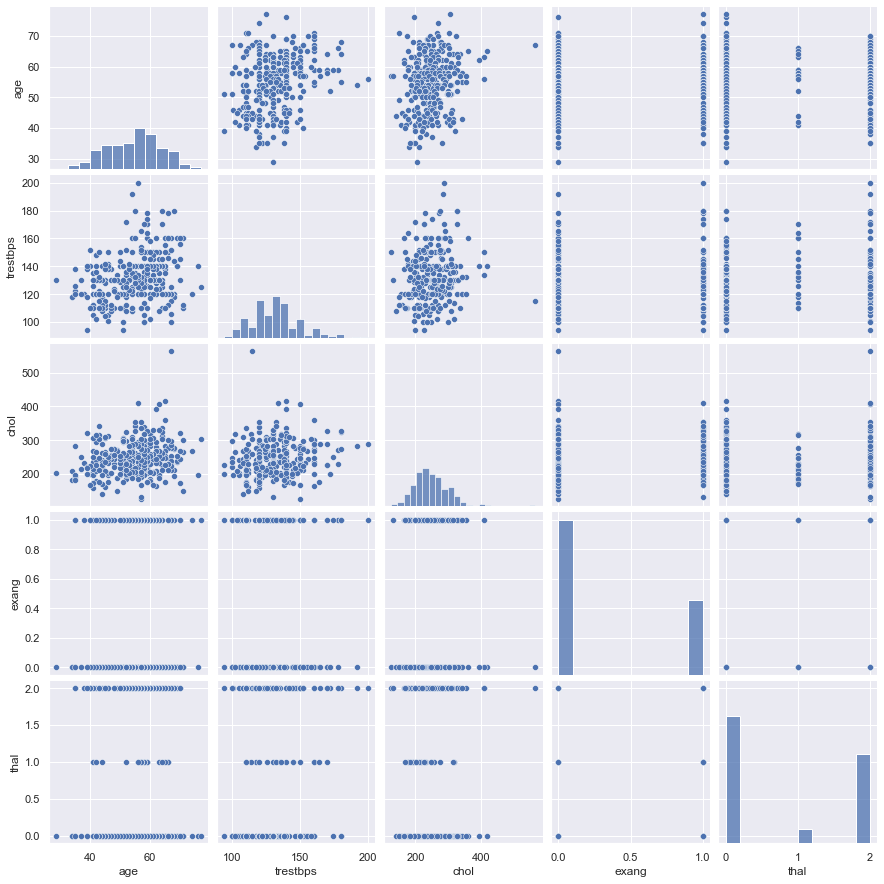

In [14]:
sns.set(rc={'figure.figsize':(25,15)})
sns.pairplot(data.loc[:,['age', 'trestbps', 'chol', 'exang', 'thal']])
plt.show()

# Replikacija rezultata

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *
from sklearn.model_selection import *
from sklearn import *
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from numpy import mean
from sklearn.svm import SVC
import random

In [51]:
#MIN-MAX augmentation
data2=data.copy()
for i in range(1013-297): 
    temp = pd.DataFrame(columns=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 
                                 'oldpeak', 'slope', 'ca', 'thal', 'condition'])
    temp['age'] = [random.randint(29, 77)]
    temp['sex'] = [random.randint(0, 1)]
    temp['cp'] = [random.randint(0, 3)]
    temp['trestbps'] = [random.randint(94, 200)]
    temp['chol'] = [random.randint(126, 564)]
    temp['fbs'] = [random.randint(0, 1)]
    temp['restecg'] = [random.randint(0, 2)]
    temp['thalach'] = [random.randint(71, 202)]
    temp['exang'] = [random.randint(0, 1)]
    temp['oldpeak'] = [round(random.uniform(0.0, 6.2), 1)]
    temp['slope'] = [random.randint(1, 3)]
    temp['ca'] = [random.randint(0, 3)]
    temp['thal'] = [random.randint(0, 2)]
    temp['condition'] = [random.randint(0, 1)]
    temp = temp.set_index(pd.Index([str(297+i)]))
    data2 = pd.concat([data2,temp])

Prvotno sam naučio sve algoritme na skupu koji nije imao nikakvu augmentaciju, ali sam dobivao premale točnosti za sve algoritme. Konkretno, preciznost Decision Tree-ja bila je samo do oko 75%, dok je za ostale algoritme preciznost iznosila 80%-87%. Stoga sam se odlučio koristiti augmentaciju na ovome skupu obzirom da ima premalo podataka u njemu.

Probao sam iskoristiti min-max augmentaciju sa svim vrijednostima potpuno nasumičnima, ali sam dobivao točnost oko 50% jer se skup napuni previše nasumičnim podacima pa se algoritmi prenauče na njima i na skupu za testiranje dobijem prevelike greške.

Stoga sam odlučio probati jednoliko izračunati sve vrijednosti atributa. Obzirom da su sve vrijednosti numeričke nije bio problem izračunati isti postotak od svakog od intervala vrijednosti atributa. Za svaki primjer izračunam određeni koeficijent, odnosno postotak te ga primijenim na interval vrijednosti svake od varijabli kako bih popunio tablicu donekle "normalnim" primjerima. Punim tablicu do 1013 koliko ih je bilo u dotičnom istraživanju. 

Postojala je i mogućnost dodavanja šuma na svaki od rezultata u postojećoj tablici, ali nisam pokušavao obzirom na (približno)dobre rezultate s prethodnim načinom augmentacije.

In [60]:
#random augmentation for each atribute
data2=data.copy()
for i in range(1013-297): 
    temp = pd.DataFrame(columns=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 
                                 'oldpeak', 'slope', 'ca', 'thal', 'condition'])
    k = random.random()
    temp['age'] = [round(k*(77-29))+29]
    temp['sex'] = [round(k*(1-0))+0]
    temp['cp'] = [round(k*(3-0))+0]
    temp['trestbps'] = [round(k*(200-94))+94]
    temp['chol'] = [round(k*(564-126))+126]
    temp['fbs'] = [round(k*(1-0))+0]
    temp['restecg'] = [round(k*(2-0))+0]
    temp['thalach'] = [round(k*(202-71))+71]
    temp['exang'] = [round(k*(1-0))+0]
    temp['oldpeak'] = [round(6.2*k, 1)]
    temp['slope'] = [round(k*(3-1))+1]
    temp['ca'] = [round(k*(3-0))+0]
    temp['thal'] = [round(k*(2-0))+0]
    temp['condition'] = [round(k*(1-0))+0]
    temp = temp.set_index(pd.Index([str(297+i)]))
    data2 = pd.concat([data2,temp])

## Decision Tree

Accuracy: 0.9220138203356367
Recall: 0.9196787148594378
Precision: 0.9215291750503019
F1: 0.920603015075377


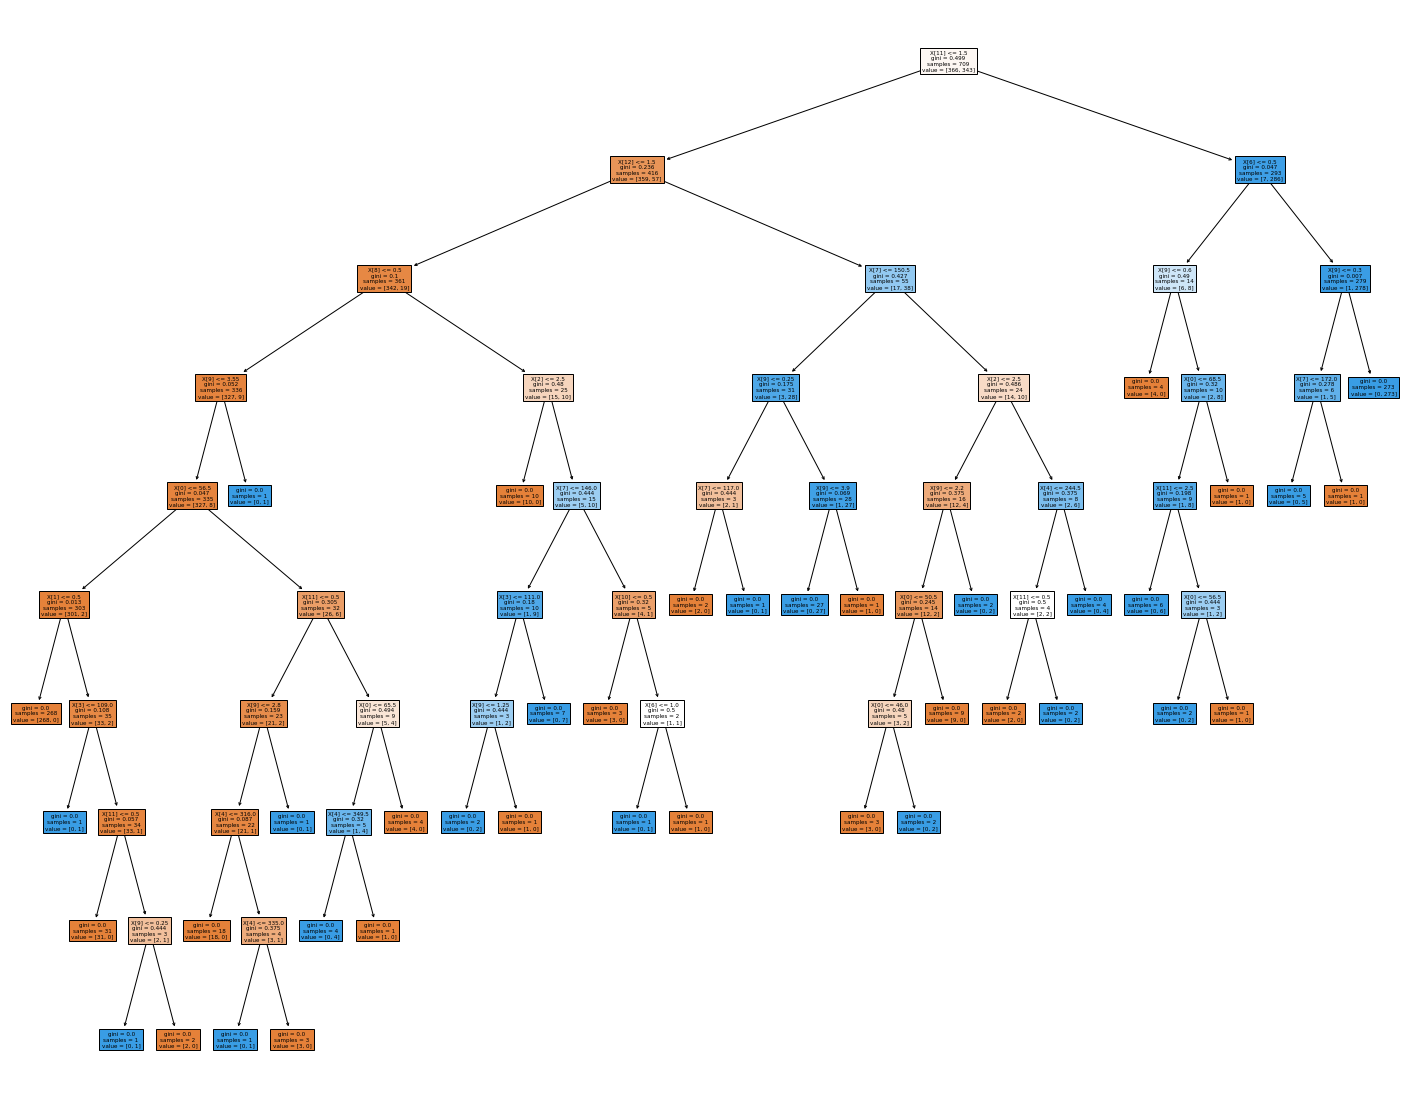

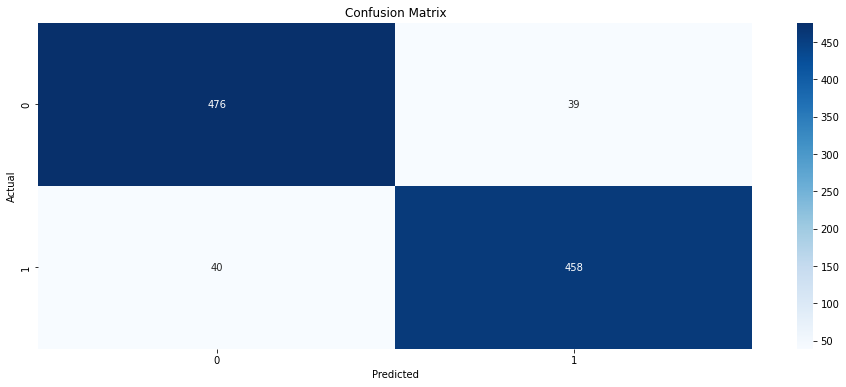

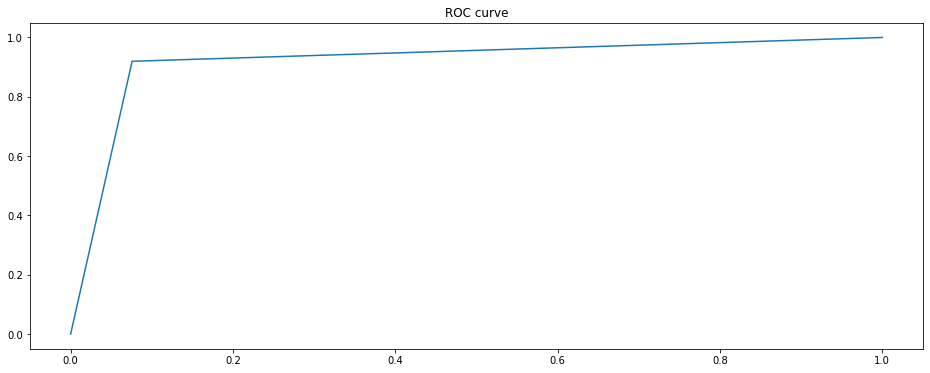

In [61]:
X = data2.iloc[:, 0:13].copy()
y = data2.iloc[:, 13:14].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
pred = cross_val_predict(clf, X, y,cv=KFold(n_splits=10, shuffle=True), n_jobs=-1)
print("Accuracy: "+str(accuracy_score(y,pred)))
print("Recall: "+str(recall_score(y,pred)))
print("Precision: "+str(precision_score(y,pred)))
print("F1: "+str(f1_score(y,pred)))
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, filled=True)
matrix = confusion_matrix(np.asarray(y).reshape(1,-1)[0], pred, labels=[0,1])   
plt.figure(figsize=(16,6))
sns.heatmap(matrix, annot=True, xticklabels=[0,1], yticklabels=[0,1], cmap="Blues", fmt="g")
plt.xlabel('Predicted') 
plt.ylabel('Actual') 
plt.title('Confusion Matrix')
plt.show()
plt.figure(figsize=(16,6))
fpr, tpr, thresholds = metrics.roc_curve(y, pred)
plt.plot(fpr, tpr, label="ROC curve")
plt.title("ROC curve")
plt.show()

## Naive Bayes

Accuracy: 0.9210266535044422
Recall: 0.893574297188755
Precision: 0.9427966101694916
F1: 0.9175257731958762


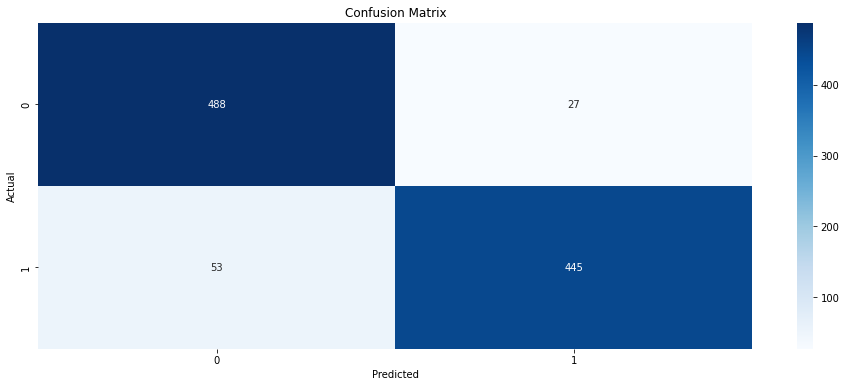

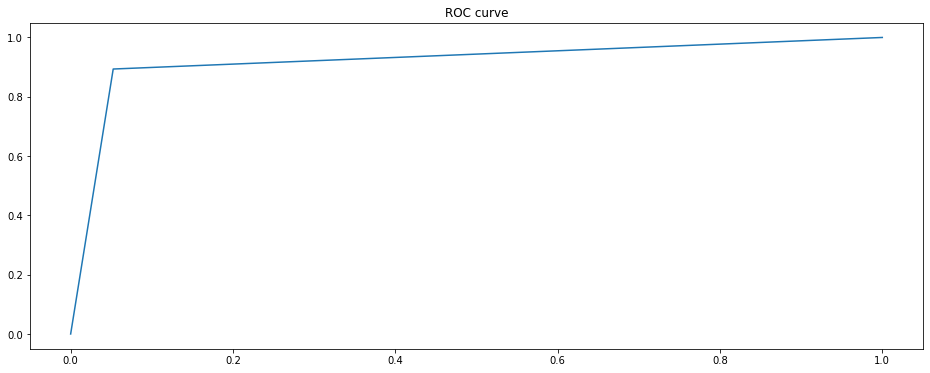

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
gnb = GaussianNB()
pred = cross_val_predict(gnb, X, y,cv=KFold(n_splits=10, shuffle=True), n_jobs=-1)
print("Accuracy: "+str(accuracy_score(y,pred)))
print("Recall: "+str(recall_score(y,pred)))
print("Precision: "+str(precision_score(y,pred)))
print("F1: "+str(f1_score(y,pred)))
matrix = confusion_matrix(np.asarray(y).reshape(1,-1)[0], pred, labels=[0,1])   
plt.figure(figsize=(16,6))
sns.heatmap(matrix, annot=True, xticklabels=[0,1], yticklabels=[0,1], cmap="Blues", fmt="g")
plt.xlabel('Predicted') 
plt.ylabel('Actual') 
plt.title('Confusion Matrix')
plt.show()
plt.figure(figsize=(16,6))
fpr, tpr, thresholds = metrics.roc_curve(y, pred)
plt.plot(fpr, tpr, label="ROC curve")
plt.title("ROC curve")
plt.show()

## Random Forest

Accuracy: 0.9496544916090819
Recall: 0.9377510040160643
Precision: 0.9589322381930184
F1: 0.9482233502538071


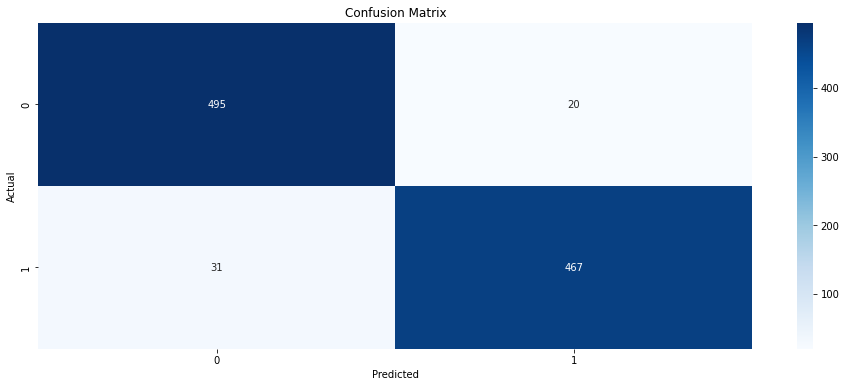

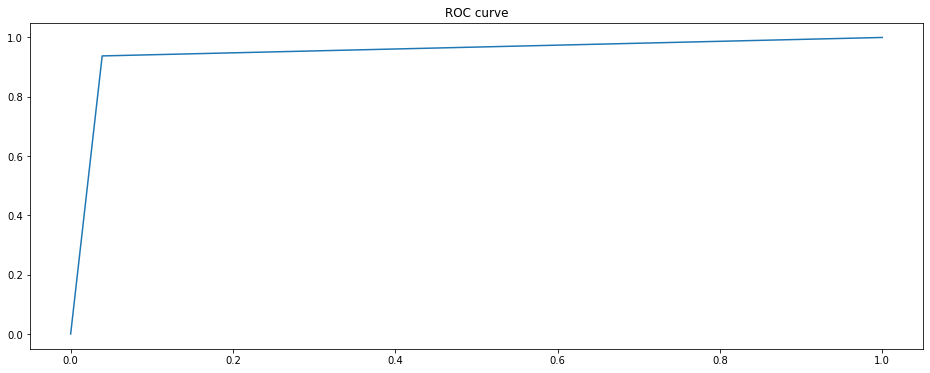

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
rfc = RandomForestClassifier()
pred = cross_val_predict(rfc, X, y,cv=KFold(n_splits=10, shuffle=True), n_jobs=-1)
print("Accuracy: "+str(accuracy_score(y,pred)))
print("Recall: "+str(recall_score(y,pred)))
print("Precision: "+str(precision_score(y,pred)))
print("F1: "+str(f1_score(y,pred)))
matrix = confusion_matrix(np.asarray(y).reshape(1,-1)[0], pred, labels=[0,1])   
plt.figure(figsize=(16,6))
sns.heatmap(matrix, annot=True, xticklabels=[0,1], yticklabels=[0,1], cmap="Blues", fmt="g")
plt.xlabel('Predicted') 
plt.ylabel('Actual') 
plt.title('Confusion Matrix')
plt.show()
plt.figure(figsize=(16,6))
fpr, tpr, thresholds = metrics.roc_curve(y, pred)
plt.plot(fpr, tpr, label="ROC curve")
plt.title("ROC curve")
plt.show()

## Logistic Regression

Accuracy: 0.945705824284304
Recall: 0.9317269076305221
Precision: 0.9567010309278351
F1: 0.9440488301119023


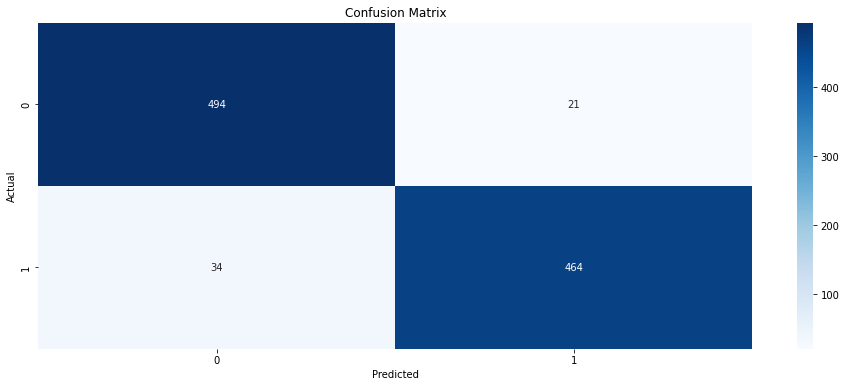

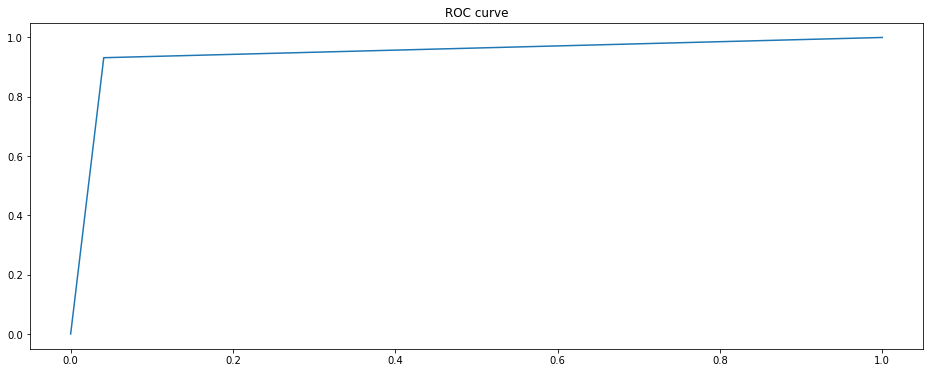

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
lrc = LogisticRegression()
pred = cross_val_predict(lrc, X, y,cv=KFold(n_splits=10, shuffle=True), n_jobs=-1)
print("Accuracy: "+str(accuracy_score(y,pred)))
print("Recall: "+str(recall_score(y,pred)))
print("Precision: "+str(precision_score(y,pred)))
print("F1: "+str(f1_score(y,pred)))
matrix = confusion_matrix(np.asarray(y).reshape(1,-1)[0], pred, labels=[0,1])   
plt.figure(figsize=(16,6))
sns.heatmap(matrix, annot=True, xticklabels=[0,1], yticklabels=[0,1], cmap="Blues", fmt="g")
plt.xlabel('Predicted') 
plt.ylabel('Actual') 
plt.title('Confusion Matrix')
plt.show()
plt.figure(figsize=(16,6))
fpr, tpr, thresholds = metrics.roc_curve(y, pred)
plt.plot(fpr, tpr, label="ROC curve")
plt.title("ROC curve")
plt.show()

## SVM

Accuracy: 0.9506416584402764
Recall: 0.9377510040160643
Precision: 0.9609053497942387
F1: 0.9491869918699187


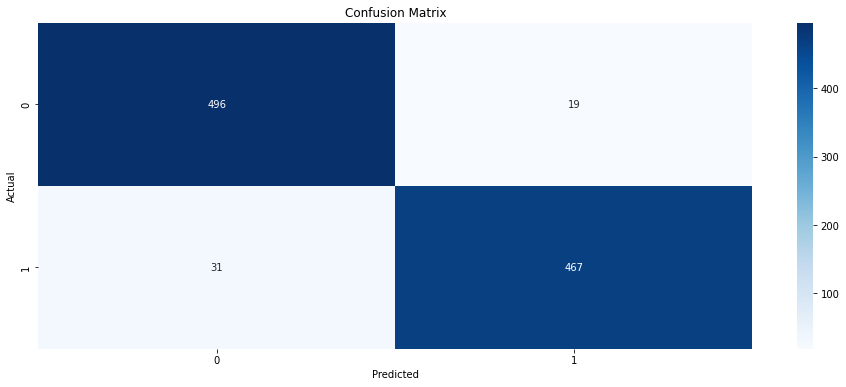

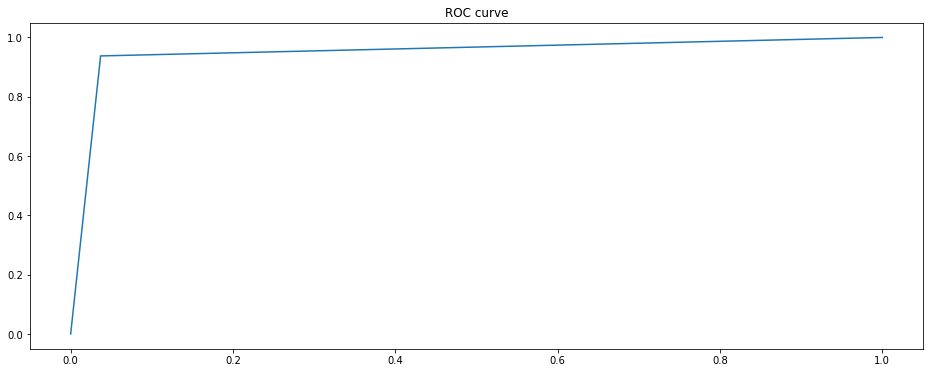

In [69]:
svm = SVC(C=0.1,kernel="linear")
pred = cross_val_predict(svm, X, y,cv=KFold(n_splits=10, shuffle=True), n_jobs=-1)
print("Accuracy: "+str(accuracy_score(y,pred)))
print("Recall: "+str(recall_score(y,pred)))
print("Precision: "+str(precision_score(y,pred)))
print("F1: "+str(f1_score(y,pred)))
matrix = confusion_matrix(np.asarray(y).reshape(1,-1)[0], pred, labels=[0,1])   
plt.figure(figsize=(16,6))
sns.heatmap(matrix, annot=True, xticklabels=[0,1], yticklabels=[0,1], cmap="Blues", fmt="g")
plt.xlabel('Predicted') 
plt.ylabel('Actual') 
plt.title('Confusion Matrix')
plt.show()
plt.figure(figsize=(16,6))
fpr, tpr, thresholds = metrics.roc_curve(y, pred)
plt.plot(fpr, tpr, label="ROC curve")
plt.title("ROC curve")
plt.show()